Using 116 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

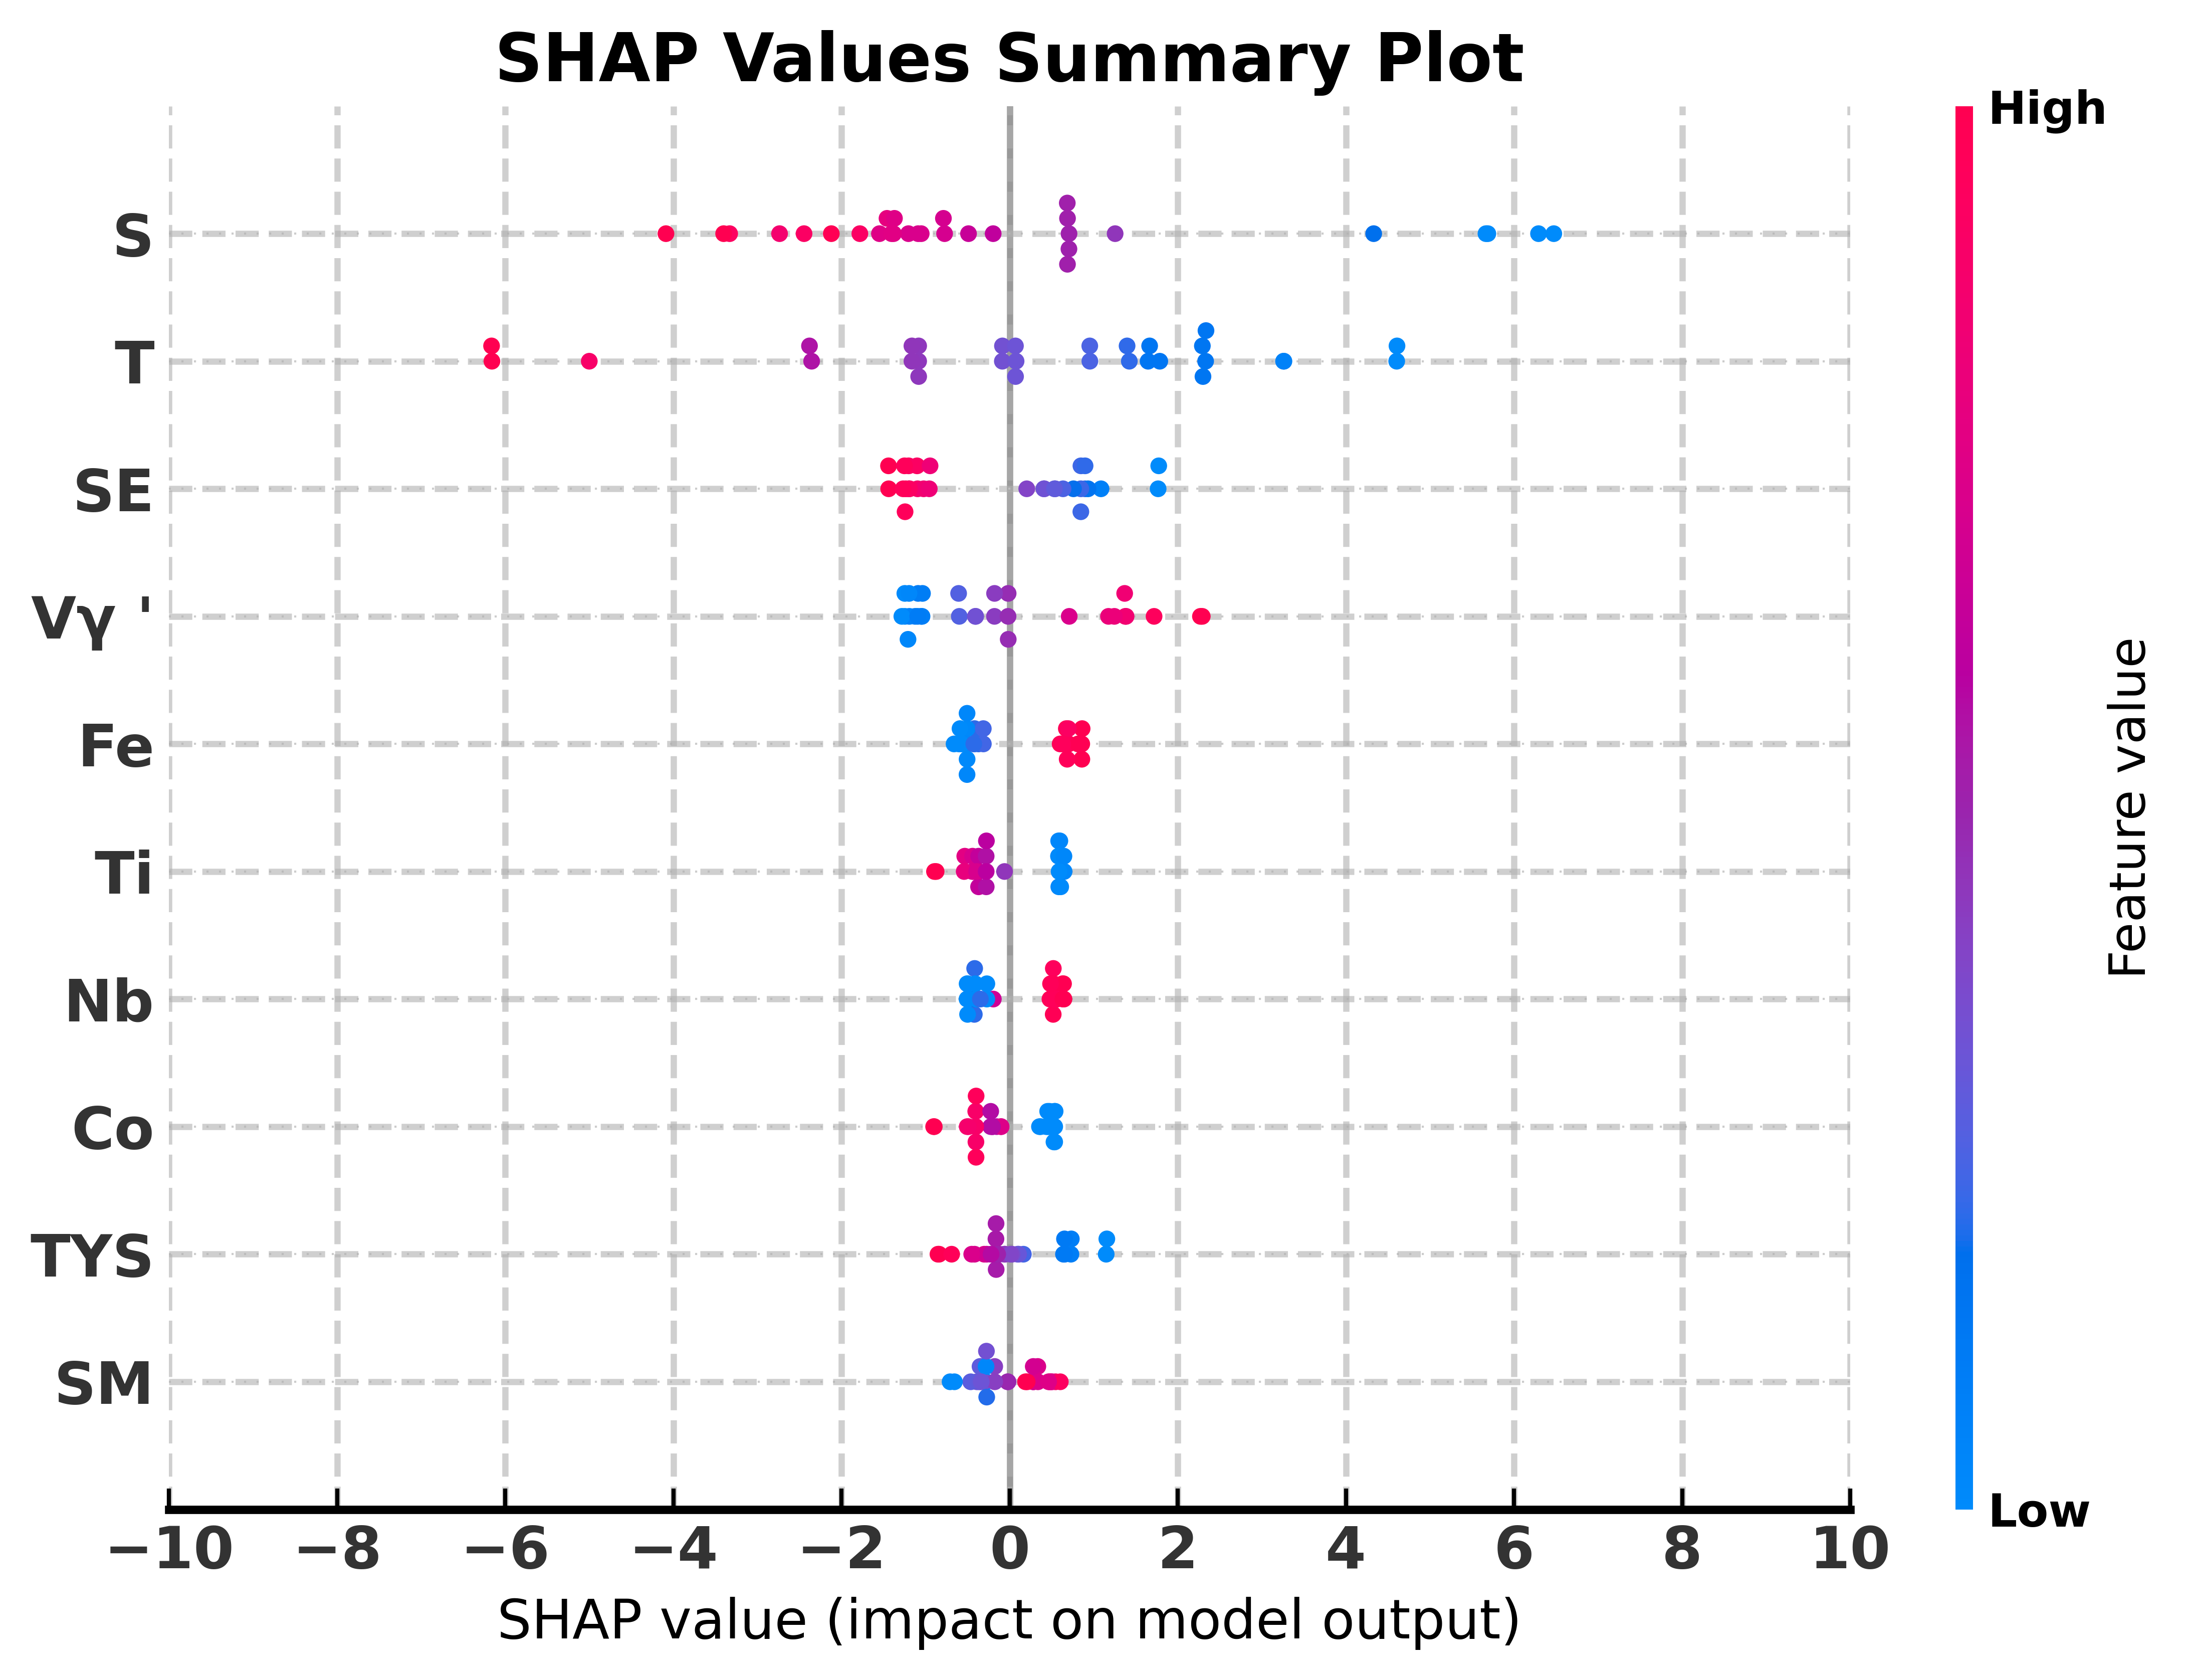

In [27]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Load data
features = pd.read_excel('蠕变综合数据库.xlsx')
label1 = features['Creep life'].to_numpy()
feature_names = features.columns  # Extract column names before conversion
features = features.drop(['Creep life'], axis=1)
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label1, test_size=0.2, random_state=42)

# Create and train the SVR model
model = SVR(C=1000, kernel='rbf', gamma=0.1)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Convert feature names to a list
feature_names_list = list(feature_names)

# Set DPI globally
plt.rcParams['figure.dpi'] = 600

# Create a summary plot
summary_plot = shap.summary_plot(shap_values, X_test, feature_names=feature_names_list, show=False, plot_type='dot', max_display=10)

# Set plot properties
plt.title('SHAP Values Summary Plot', fontsize=16, fontweight='bold')
plt.xticks(np.arange(-10, 11, step=2), fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.tick_params(axis='both', direction='in', length=5, width=1, color='black')
plt.rcParams["font.weight"] = "bold"
plt.grid(True, linestyle='--', alpha=0.6, linewidth=1.5)

plt.show()

Using 116 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

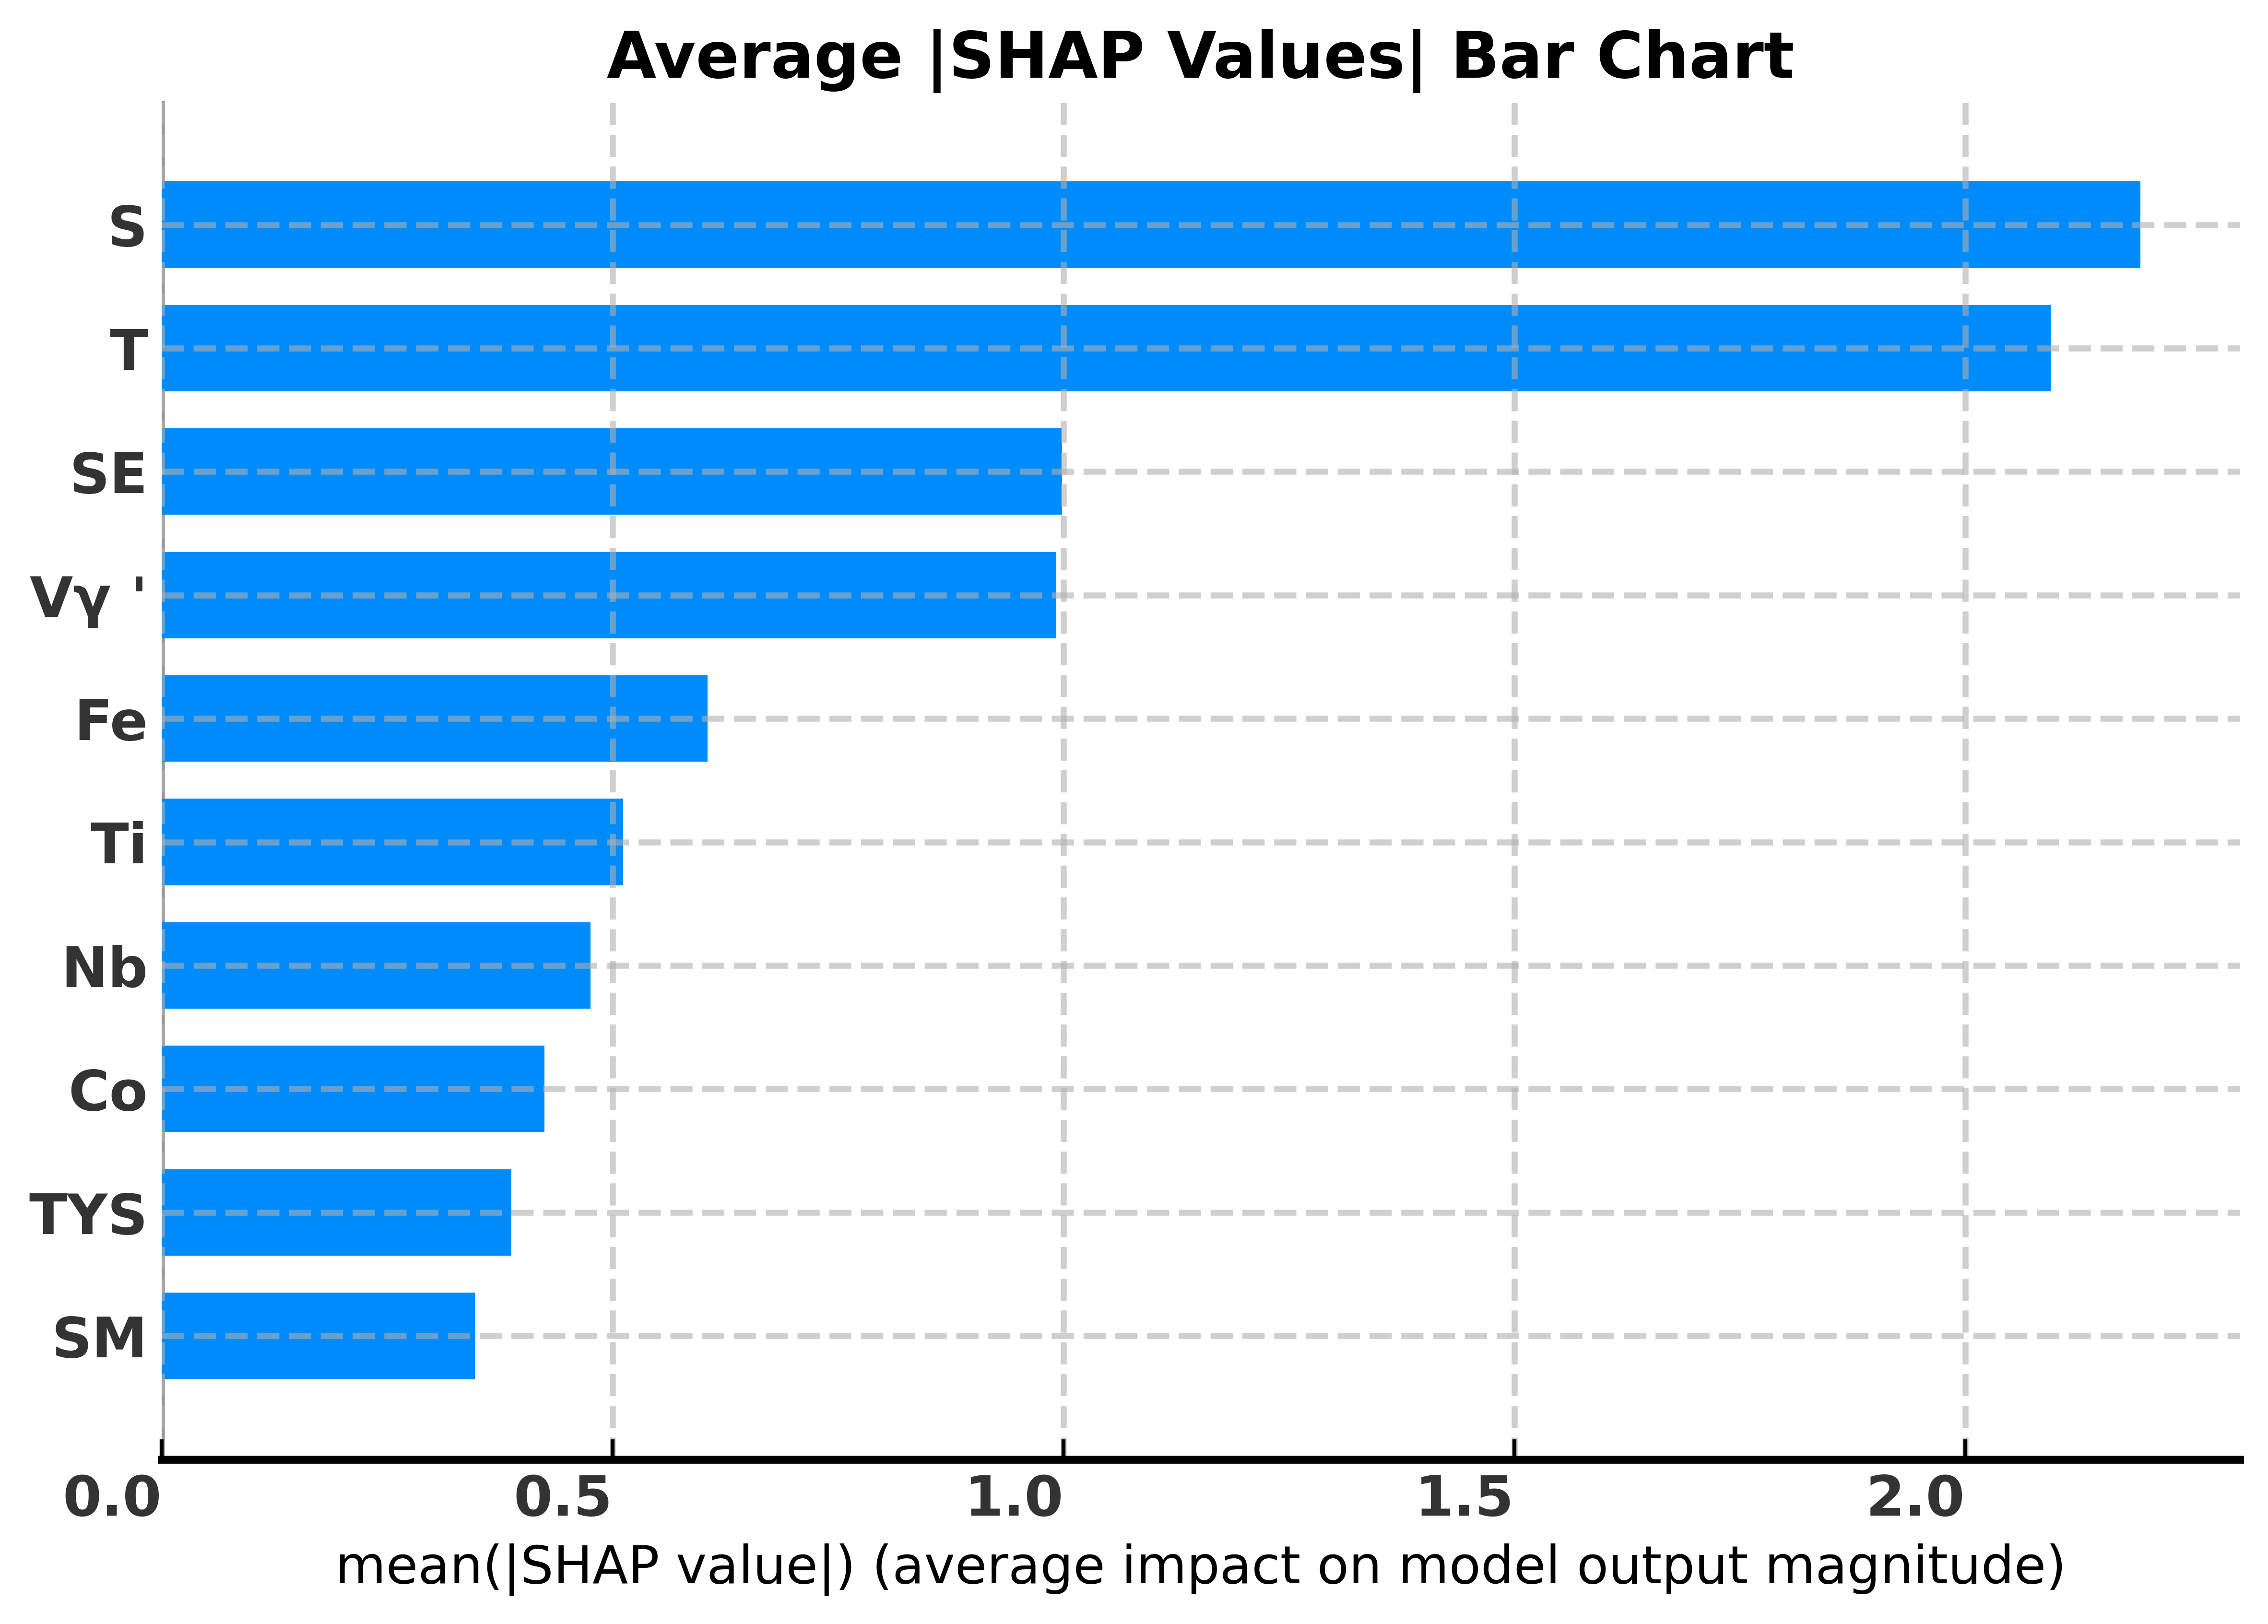

In [68]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Load data
features = pd.read_excel('蠕变综合数据库.xlsx')
label1 = features['Creep life'].to_numpy()
feature_names = features.columns  # Extract column names before conversion
features = features.drop(['Creep life'], axis=1)
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label1, test_size=0.2, random_state=42)

# Create and train the SVR model
model = SVR(C=1000, kernel='rbf', gamma=0.1)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Convert feature names to a list
feature_names_list = list(feature_names)

# Set DPI globally
plt.rcParams['figure.dpi'] = 600

# Create a summary plot with bar chart
summary_plot = shap.summary_plot(shap_values, features=X_test, feature_names=feature_names_list, show=False, plot_type='bar', max_display=10)

# Set plot properties
plt.title('Average |SHAP Values| Bar Chart', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold', rotation=0, ha='right')
plt.yticks(fontsize=14, fontweight='bold')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.tick_params(axis='both', direction='in', length=5, width=1, color='black')
plt.rcParams["font.weight"] = "bold"
plt.grid(True, linestyle='--', alpha=0.6, linewidth=1.5)

plt.show()